In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from einops import rearrange, repeat
import numpy as np
import mpl_toolkits.mplot3d as Axes3d
from PIL import Image
from torch import nn, optim, reshape
import random

TASK 2.1

In [2]:
transform = transforms.Compose([transforms.ToTensor()
                              ])

In [3]:
trainset = datasets.MNIST(r'..\input\MNIST', download=True, train=True, transform= transform)
subset_indices = torch.randperm(len(trainset))[:1000]
mnist_subset = torch.utils.data.Subset(trainset, subset_indices)

testset = datasets.MNIST(r'..\input\MNIST', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=25, shuffle=True)

In [4]:
len(mnist_subset)

1000

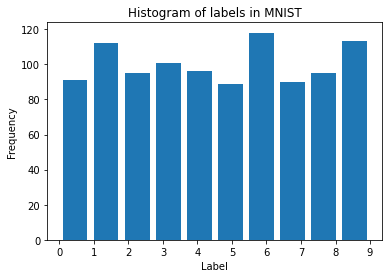

In [5]:
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]

# plot the histogram of the labels
plt.hist(labels, bins=10, range=(0, 9), align='mid', rwidth=0.8)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of labels in MNIST')
plt.xticks(range(10))
plt.show()

In [6]:
dataloader = torch.utils.data.DataLoader(mnist_subset, batch_size=25,shuffle=True)

the above shows that the tensor is 28 by 28 and the label is integer (tensor[28x28], label)

In [7]:
mnist_subset[0][0][0][12][12].item()

0.7058823704719543

In [8]:
all_data = torch.empty((len(dataloader), 25, 1, 28, 28))
for i, b in enumerate(dataloader):
    all_data[i] = b[0]

In [9]:
all_data.shape

torch.Size([40, 25, 1, 28, 28])

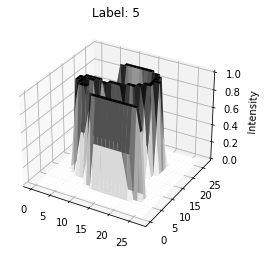

In [10]:
random_idx = torch.randint(len(trainset), size=(1,)).item()
image, label = trainset[random_idx]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

image_np = image.squeeze().numpy()
image_np_3d = np.zeros((28, 28, 3))
image_np_3d[:, :, 0] = image_np

# Extract the x, y, and z coordinates
x = np.arange(28)
y = np.arange(28)
x, y = np.meshgrid(x, y)
z = image_np_3d[:, :, 0]


# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='Greys', linewidth=0)

# Set the z axis limits and labels
ax.set_zlim(0, 1)
ax.set_zlabel('Intensity')

# Show the plot
plt.title(f'Label: {label}')
plt.show()

TASK 2.2

In [11]:
import pandas as pd

In [12]:
import requests

In [13]:
url = 'https://raw.githubusercontent.com/LuisM78/Appliances-energy-prediction-data/master/energydata_complete.csv'
response = requests.get(url)

with open('energydata_complete.csv', 'w') as f:
    f.write(response.text)

energydata = pd.read_csv('energydata_complete.csv')

energydata_np =energydata.to_numpy()
print(energydata_np.shape)

(19735, 29)


[13.275433157104999 18.606194981839508 28.64266816759482 ...
 29.19911708449945 6.322783650830388 34.11885058740154]


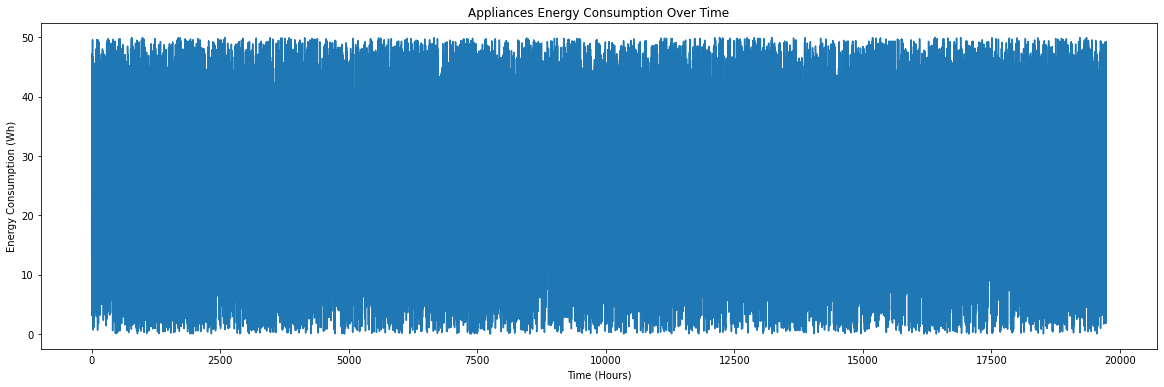

In [14]:
energy_consumption = energydata_np[:,28]
print(energy_consumption)
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(energy_consumption)
plt.xlabel('Time (Hours)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption Over Time')
plt.show()

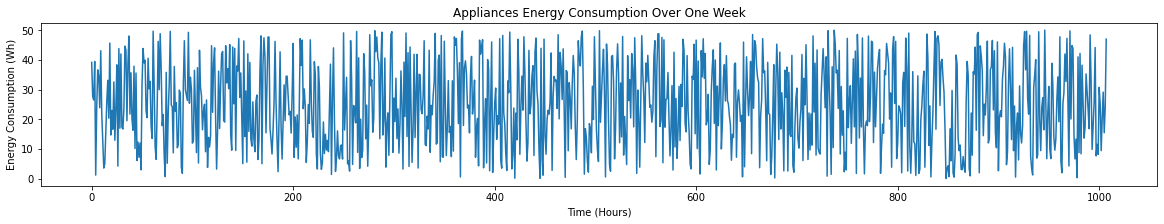

In [15]:
energy_consumption_1st_week = energydata_np[42:7*24*6+42,27]
energy_consumption_1st_week
fig, ax = plt.subplots(figsize=(20, 3))
plt.plot(energy_consumption_1st_week)
plt.xlabel('Time (Hours)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption Over One Week')
plt.show()

In [16]:
import seaborn as sns

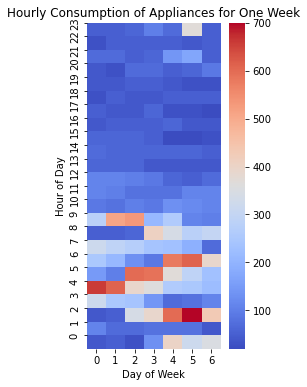

In [17]:
week_start = 7000
week_end = week_start + 168
week_data = energydata['Appliances'][week_start:week_end]

# Reshape the data into a 7x24 matrix
week_matrix = week_data.values.reshape(24, 7)
week_matrix = np.flip(week_matrix, axis=0)

# Plot the heatmap
plt.figure(figsize=(3, 6))
sns.heatmap(week_matrix, cmap='coolwarm', annot=False)
plt.ylabel('Hour of Day')
plt.xlabel('Day of Week')
plt.title('Hourly Consumption of Appliances for One Week')
plt.yticks(np.arange(24), np.arange(24)[::-1])
plt.show()


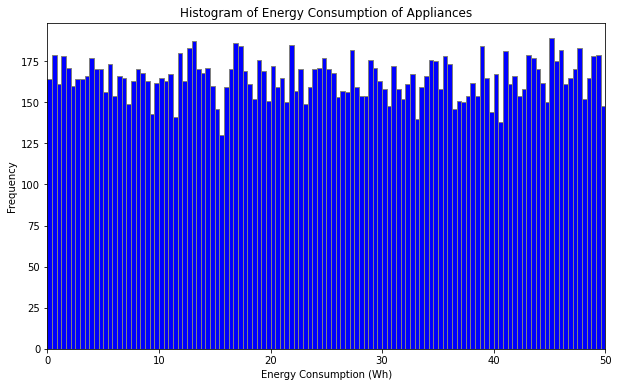

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(energy_consumption, bins=120, color='blue', edgecolor='gray')
plt.xlim(0, 50)
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Consumption of Appliances')
plt.show()

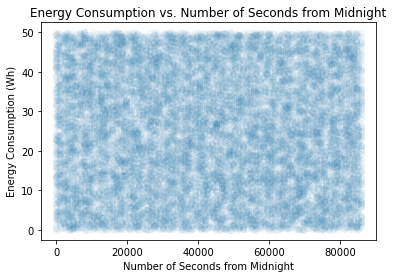

In [19]:
energydata['date'] = pd.to_datetime(energydata['date'], format='%Y-%m-%d %H:%M:%S')
energydata['NSM'] = (energydata['date'].dt.hour * 3600) + (energydata['date'].dt.minute * 60) + energydata['date'].dt.second

#energy consumption vs NSM
plt.scatter(energydata['NSM'], energy_consumption, alpha=0.03)
plt.xlabel('Number of Seconds from Midnight')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs. Number of Seconds from Midnight')
plt.show()

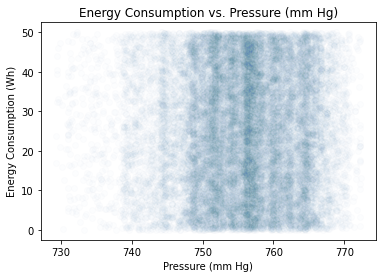

In [20]:
press_mm_hg = energydata['Press_mm_hg'].values

#energy consumption vs Press_mm_hg
plt.scatter(press_mm_hg, energy_consumption, alpha=0.01)
plt.xlabel('Pressure (mm Hg)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs. Pressure (mm Hg)')
plt.show()

6. Looking at the plots of energy consumption vs NSM and .vs Pressure , we cannot really get an idea of the impact of these factors on the energy consumption. 
   There may be another factor that may be hiding their influence on the energy consumption.
   if we chose to look at the heatmap in Hours instead of Number of seconds from Midnight, we can see that there is a increase in Energy consumption from hour 0 to Hour 10.
   

Ignore the below cell (was trying to find corelation between no. of lights and energy consumption)

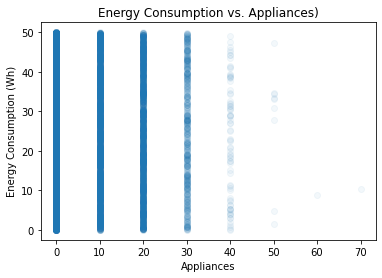

In [21]:
lights = energydata['lights'].values

#energy consumption vs Appliances
plt.scatter(lights, energy_consumption, alpha=0.05)
plt.xlabel('Appliances')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs. Appliances)')
plt.show()

TASK 2.3

In [22]:
airfoil_data = pd.read_csv('airfoil_self_noise.dat', sep='\t', header=None)
factors = airfoil_data.iloc[:, :5]

In [23]:
airfoil_data.columns = ["frequency", "angle of attack", "chord length", "velocity", "tickness", "pressure level"]
airfoil_data.mean()

frequency          2886.380572
angle of attack       6.782302
chord length          0.136548
velocity             50.860745
tickness              0.011140
pressure level      124.835943
dtype: float64

In [24]:
airfoil_data.var()

frequency          9.938717e+06
angle of attack    3.502424e+01
chord length       8.749868e-03
velocity           2.425116e+02
tickness           1.729287e-04
pressure level     4.759146e+01
dtype: float64

In [25]:
airfoil_data.median()

frequency          1600.000000
angle of attack       5.400000
chord length          0.101600
velocity             39.600000
tickness              0.004957
pressure level      125.721000
dtype: float64

In [26]:
airfoil_data.kurtosis()

frequency          5.708685
angle of attack   -0.412951
chord length      -1.037964
velocity          -1.563951
tickness           2.218903
pressure level    -0.314187
dtype: float64

In [27]:
airfoil_data.skew()

frequency          2.137084
angle of attack    0.689164
chord length       0.457457
velocity           0.235852
tickness           1.702165
pressure level    -0.418952
dtype: float64

In [28]:
rng = factors.max() - factors.min()
print(rng)

0    19800.000000
1       22.200000
2        0.279400
3       39.600000
4        0.058011
dtype: float64
